In [115]:
import os
import json
import matplotlib.pyplot as plt

In [116]:
def read_metrics_from_folder(folder):
    metrics_data = {}
    for filename in os.listdir(folder):
        if filename.endswith('.json') and filename.startswith('binary_classifier_'):
            k_value = int(filename.split('_')[2].split('.')[0])
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as file:
                metrics_data[k_value] = json.load(file)
    return metrics_data

def plot_accuracy(metrics_data):
    ks = sorted(metrics_data.keys())
    classifiers = list(metrics_data[ks[0]].keys())
    
    fig, ax = plt.subplots(figsize=(12, 5))
    
    for k in ks:
        accuracies = [metrics_data[k][classifier]['accuracy'] for classifier in classifiers]
        ax.plot(classifiers, accuracies, label=f'k={k}')
    
    ax.set_title('Accuracy of Classifiers for Different k Values')
    ax.set_xlabel('Classifiers')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(False)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_metrics(metrics_data):
    ks = sorted(metrics_data.keys())
    classifiers = list(metrics_data[ks[0]].keys())
    
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    metric_titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, metric in enumerate(metrics):
        ax = axs[i]
        for k in ks:
            metric_values = [metrics_data[k][classifier][metric] for classifier in classifiers]
            ax.plot(classifiers, metric_values, label=f'k={k}')
        
        ax.set_title(f'{metric_titles[i]} of Classifiers for Different k Values')
        ax.set_xlabel('Classifiers')
        ax.set_ylabel(metric_titles[i])
        ax.legend()
        ax.grid(False)
        ax.set_xticklabels(classifiers, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

#### **COMPARE BINERY CLASSIFIER**

/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_53289/876458165.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classifiers, rotation=45, ha='right')
/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_53289/876458165.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classifiers, rotation=45, ha='right')
/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_53289/876458165.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classifiers, rotation=45, ha='right')
/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_53289/876458165.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

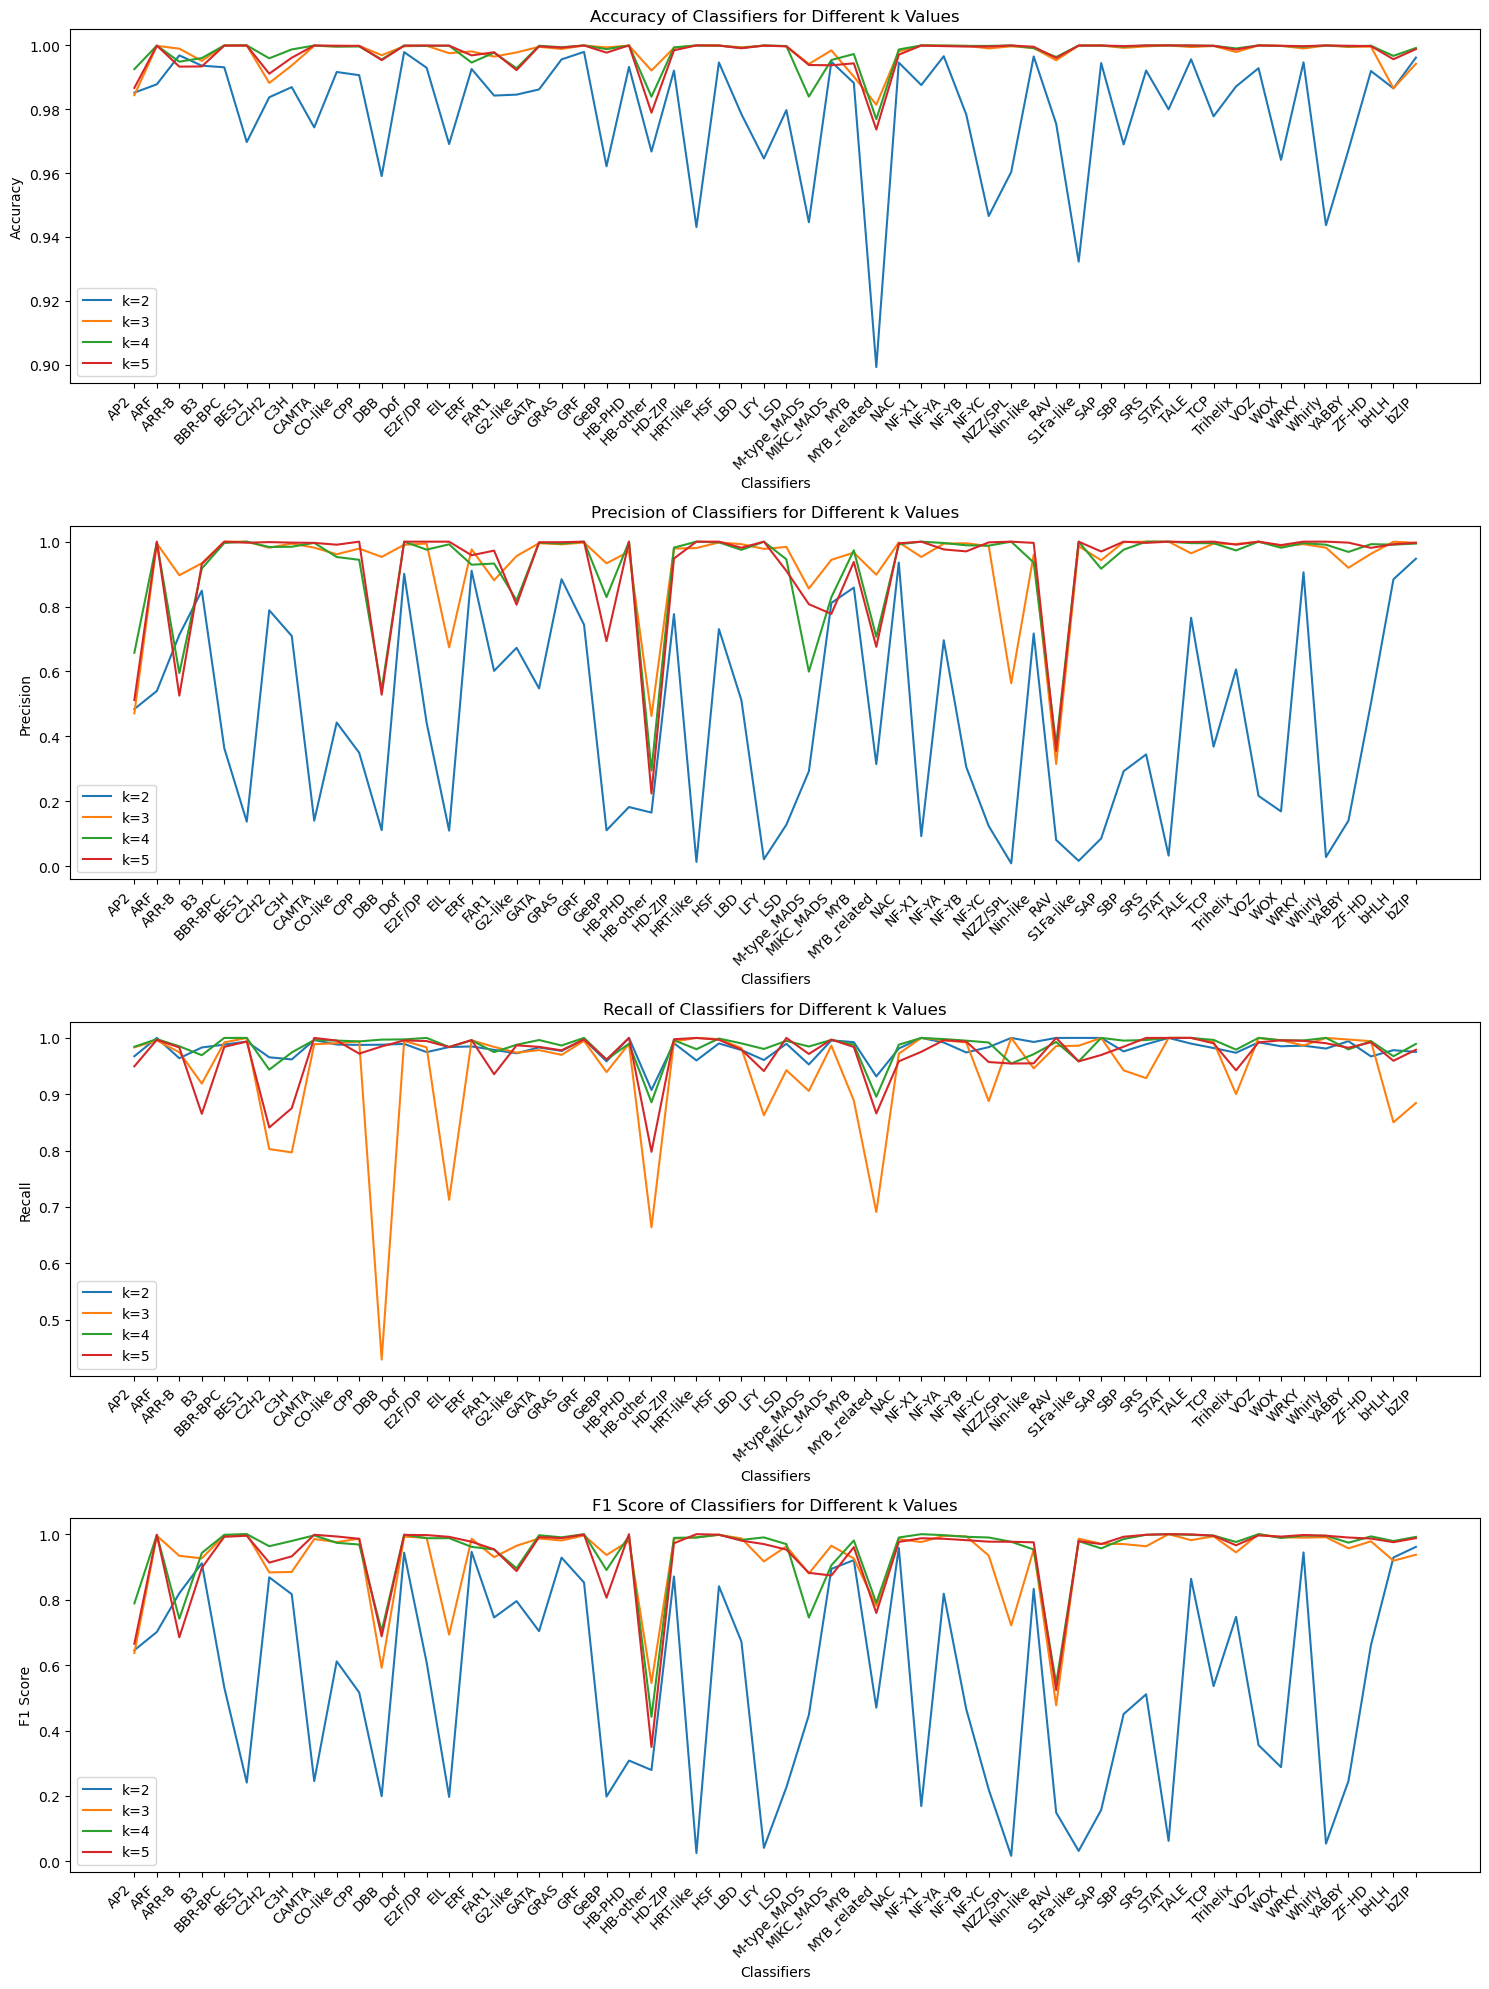

In [117]:
metrics_data = read_metrics_from_folder('./metrics')
plot_metrics(metrics_data)

In [118]:
import os
import json
import pandas as pd
from IPython.display import display

In [119]:
def read_metrics_from_folder(folder):
    metrics_data = {}
    for filename in os.listdir(folder):
        if filename.endswith('.json') and filename.startswith('binary_classifier_'):
            k_value = int(filename.split('_')[2].split('.')[0])
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r') as file:
                metrics_data[k_value] = json.load(file)
    return metrics_data

def extract_metric_df(metrics_data, metric_name):
    ks = sorted(metrics_data.keys())
    classifiers = list(metrics_data[ks[0]].keys())
    
    data = {classifier: [] for classifier in classifiers}
    for k in ks:
        for classifier in classifiers:
            data[classifier].append(metrics_data[k][classifier][metric_name])
    
    df = pd.DataFrame(data, index=ks).T
    df.index.name = 'kmer_size'
    return df


def get_all_metrics_dfs(folder):
    metrics_data = read_metrics_from_folder(folder)
    
    accuracy_df = extract_metric_df(metrics_data, 'accuracy')
    precision_df = extract_metric_df(metrics_data, 'precision')
    recall_df = extract_metric_df(metrics_data, 'recall')
    f1_df = extract_metric_df(metrics_data, 'f1')
    
    return accuracy_df.T, precision_df.T, recall_df.T, f1_df.T

def split_df_into_chunks(df, chunk_size):
    """
    Splits a DataFrame into chunks based on columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to split.
    chunk_size (int): The number of columns in each chunk.

    Returns:
    list of pd.DataFrame: A list containing the chunked DataFrames.
    """
    chunks = []
    num_chunks = (len(df.columns) + chunk_size - 1) // chunk_size  # Calculate the number of chunks
    
    for i in range(num_chunks):
        start_col = i * chunk_size
        end_col = min((i + 1) * chunk_size, len(df.columns))
        chunk = df.iloc[:, start_col:end_col]
        chunks.append(chunk)
    
    return chunks

In [120]:
accuracy_df, precision_df, recall_df, f1_df = get_all_metrics_dfs("./metrics")

In [121]:
accuracy_df_chunck = split_df_into_chunks(accuracy_df, 14)
styled_chuncks = []
for df in accuracy_df_chunck:
    styled_chuncks.append(df.style.bar(subset=df.columns.values, color='#46a147'))
for styled_df in styled_chuncks:
    display(styled_df)

kmer_size,AP2,ARF,ARR-B,B3,BBR-BPC,BES1,C2H2,C3H,CAMTA,CO-like,CPP,DBB,Dof,E2F/DP
2,0.985209,0.987814,0.996879,0.993650,0.993150,0.969715,0.983757,0.986925,0.974318,0.991668,0.990670,0.959043,0.997894,0.992994
3,0.984397,0.999860,0.998986,0.995148,0.999969,1.000000,0.988235,0.993712,0.999875,0.999672,0.999860,0.996942,0.999735,0.999875
4,0.992566,0.999937,0.994902,0.996038,0.999984,1.000000,0.995960,0.998737,0.999968,0.999637,0.999669,0.995612,0.999953,0.999858
5,0.986691,0.999953,0.993353,0.993416,0.999938,0.999953,0.991138,0.996146,0.999984,0.999906,0.999860,0.995382,0.999922,0.999969


kmer_size,EIL,ERF,FAR1,G2-like,GATA,GRAS,GRF,GeBP,HB-PHD,HB-other,HD-ZIP,HRT-like,HSF,LBD
2,0.969091,0.992604,0.984288,0.984584,0.986207,0.995616,0.997972,0.962132,0.993275,0.966750,0.992105,0.943081,0.994648,0.978468
3,0.997566,0.998128,0.996505,0.997800,0.999563,0.998892,0.999953,0.999376,0.999938,0.992136,0.999251,0.999984,0.999938,0.999423
4,0.999905,0.994634,0.997727,0.992834,0.999890,0.999432,1.000000,0.998832,0.999984,0.983933,0.999384,0.999984,0.999953,0.999195
5,0.999938,0.996879,0.997862,0.992261,0.999704,0.999313,0.999984,0.997738,1.000000,0.978921,0.998471,1.000000,0.999953,0.999111


kmer_size,LFY,LSD,M-type_MADS,MIKC_MADS,MYB,MYB_related,NAC,NF-X1,NF-YA,NF-YB,NF-YC,NZZ/SPL,Nin-like,RAV
2,0.964566,0.979732,0.944594,0.994898,0.988235,0.899206,0.994617,0.987580,0.996614,0.978343,0.946545,0.960353,0.996552,0.975457
3,0.999875,0.999782,0.994180,0.998440,0.990217,0.981417,0.998128,0.999938,0.999922,0.999875,0.999048,0.999735,0.999189,0.995350
4,0.999984,0.999811,0.983964,0.995423,0.997301,0.976894,0.998722,1.000000,0.999953,0.999842,0.999842,0.999984,0.999163,0.996370
5,0.999953,0.999704,0.993868,0.993774,0.994383,0.973647,0.997098,0.999969,0.999782,0.999641,0.999657,0.999984,0.999579,0.996084


kmer_size,S1Fa-like,SAP,SBP,SRS,STAT,TALE,TCP,Trihelix,VOZ,WOX,WRKY,Whirly,YABBY,ZF-HD
2,0.932268,0.994477,0.968982,0.992136,0.979966,0.995662,0.977766,0.987143,0.992870,0.964145,0.994711,0.943674,0.967250,0.991980
3,0.999969,0.999969,0.999235,0.999704,1.000000,0.999485,0.999828,0.997925,1.000000,0.999860,0.999048,0.999969,0.999516,0.999641
4,0.999953,0.999953,0.999605,0.999984,1.000000,0.999937,0.999890,0.999053,1.000000,0.999826,0.999590,0.999984,0.999716,0.999890
5,0.999953,0.999969,0.999797,0.999984,1.000000,0.999984,0.999875,0.998705,0.999984,0.999891,0.999766,0.999984,0.999891,0.999782


kmer_size,bHLH,bZIP
2,0.986550,0.996193
3,0.986566,0.994258
4,0.996717,0.999195
5,0.995678,0.998830


In [122]:
precision_df_chunck = split_df_into_chunks(precision_df, 14)
styled_chuncks = []
for df in precision_df_chunck:
    styled_chuncks.append(df.style.bar(subset=df.columns.values, color='#46a147'))
for styled_df in styled_chuncks:
    display(styled_df)

kmer_size,AP2,ARF,ARR-B,B3,BBR-BPC,BES1,C2H2,C3H,CAMTA,CO-like,CPP,DBB,Dof,E2F/DP
2,0.484287,0.539776,0.712716,0.849003,0.363504,0.137072,0.788493,0.709395,0.140094,0.442571,0.349398,0.110923,0.900966,0.441624
3,0.470999,0.994547,0.896484,0.933461,1.000000,1.000000,0.981392,0.994208,0.981550,0.961187,0.978659,0.953020,0.990317,0.994334
4,0.657678,0.997817,0.594872,0.917075,0.996047,1.000000,0.983549,0.984367,0.996283,0.952703,0.944118,0.543657,1.000000,0.975410
5,0.511782,1.000000,0.525539,0.931034,1.000000,0.996764,0.998661,0.997062,0.996296,0.990632,1.000000,0.528363,1.000000,1.000000


kmer_size,EIL,ERF,FAR1,G2-like,GATA,GRAS,GRF,GeBP,HB-PHD,HB-other,HD-ZIP,HRT-like,HSF,LBD
2,0.109459,0.910324,0.601878,0.672855,0.547781,0.884241,0.744048,0.110538,0.182163,0.165068,0.776765,0.012994,0.730645,0.511409
3,0.674330,0.976334,0.881094,0.955765,0.995234,0.991758,0.997333,0.933333,0.969388,0.462481,0.978821,0.980392,0.997814,0.992297
4,0.991837,0.928918,0.932656,0.819404,0.997186,0.994044,1.000000,0.829201,1.000000,0.294375,0.981672,1.000000,0.997817,0.974761
5,1.000000,0.958125,0.972395,0.805705,0.998099,0.998354,1.000000,0.693548,1.000000,0.223798,0.948095,1.000000,1.000000,0.981250


kmer_size,LFY,LSD,M-type_MADS,MIKC_MADS,MYB,MYB_related,NAC,NF-X1,NF-YA,NF-YB,NF-YC,NZZ/SPL,Nin-like,RAV
2,0.021139,0.127774,0.292395,0.811065,0.858489,0.314242,0.935622,0.092360,0.696148,0.305668,0.123590,0.008584,0.717080,0.080655
3,0.977778,0.983696,0.855444,0.943983,0.966206,0.898097,0.997946,0.952941,0.993915,0.995146,0.986395,0.564103,0.959707,0.314815
4,1.000000,0.945545,0.599435,0.828726,0.973402,0.706622,0.991717,1.000000,0.995943,0.988782,0.987805,1.000000,0.935652,0.374317
5,1.000000,0.909953,0.807269,0.777465,0.937514,0.675806,0.994809,1.000000,0.976096,0.970079,0.997872,1.000000,0.996234,0.354756


kmer_size,S1Fa-like,SAP,SBP,SRS,STAT,TALE,TCP,Trihelix,VOZ,WOX,WRKY,Whirly,YABBY,ZF-HD
2,0.016315,0.085271,0.292595,0.344241,0.032404,0.765475,0.368280,0.606468,0.216495,0.168723,0.905648,0.028017,0.140221,0.502004
3,0.986111,0.942857,0.998729,1.000000,1.000000,0.964130,0.994019,0.992952,1.000000,0.985325,0.992395,0.981481,0.919571,0.962617
4,1.000000,0.916667,0.975323,1.000000,1.000000,0.995511,0.995227,0.973016,1.000000,0.981211,0.995533,0.990654,0.968391,0.992293
5,1.000000,0.969697,1.000000,0.996255,1.000000,0.998874,1.000000,0.990764,1.000000,0.989474,1.000000,1.000000,0.997050,0.980916


kmer_size,bHLH,bZIP
2,0.883974,0.947649
3,0.999795,0.996366
4,0.990798,0.994165
5,0.992074,0.996716


In [123]:
recall_df_chunck = split_df_into_chunks(recall_df, 14)
styled_chuncks = []
for df in recall_df_chunck:
    styled_chuncks.append(df.style.bar(subset=df.columns.values, color='#46a147'))
for styled_df in styled_chuncks:
    display(styled_df)

kmer_size,AP2,ARF,ARR-B,B3,BBR-BPC,BES1,C2H2,C3H,CAMTA,CO-like,CPP,DBB,Dof,E2F/DP
2,0.967489,1.000000,0.963907,0.983035,0.988095,0.993548,0.965614,0.961836,0.996283,0.988235,0.987616,0.987915,0.989390,0.974790
3,0.983184,0.995633,0.974522,0.918944,0.992063,1.000000,0.802706,0.796802,0.988848,0.990588,0.993808,0.429003,0.994695,0.983193
4,0.984305,0.997817,0.985138,0.969369,1.000000,1.000000,0.943630,0.974214,0.996283,0.995294,0.993808,0.996979,0.997347,1.000000
5,0.949552,0.996725,0.983015,0.865221,0.984127,0.993548,0.841037,0.875193,1.000000,0.995294,0.972136,0.984894,0.995579,0.994398


kmer_size,EIL,ERF,FAR1,G2-like,GATA,GRAS,GRF,GeBP,HB-PHD,HB-other,HD-ZIP,HRT-like,HSF,LBD
2,0.983806,0.984856,0.978752,0.972658,0.983130,0.976894,0.997340,0.958466,1.000000,0.907692,0.990703,0.960000,0.990164,0.978517
3,0.712551,0.995741,0.984064,0.973671,0.978444,0.969909,0.994681,0.939297,0.989583,0.663736,0.993608,1.000000,0.997814,0.981982
4,0.983806,0.995741,0.974768,0.987848,0.996251,0.986566,1.000000,0.961661,0.989583,0.885714,0.995933,0.980000,0.998907,0.990298
5,0.983806,0.996214,0.935591,0.986835,0.984067,0.977969,0.997340,0.961661,1.000000,0.797802,0.997676,1.000000,0.996721,0.979210


kmer_size,LFY,LSD,M-type_MADS,MIKC_MADS,MYB,MYB_related,NAC,NF-X1,NF-YA,NF-YB,NF-YC,NZZ/SPL,Nin-like,RAV
2,0.960784,0.989583,0.952949,0.995665,0.992512,0.931685,0.981245,1.000000,0.991870,0.974194,0.983673,1.000000,0.992780,1.000000
3,0.862745,0.942708,0.905898,0.986272,0.888813,0.690956,0.971993,1.000000,0.995935,0.991935,0.887755,1.000000,0.945848,0.985507
4,0.980392,0.994792,0.984758,0.996387,0.988201,0.895576,0.987997,1.000000,0.997967,0.995161,0.991837,0.954545,0.971119,0.992754
5,0.941176,1.000000,0.971504,0.997110,0.983889,0.865973,0.958490,0.975309,0.995935,0.993548,0.957143,0.954545,0.954874,1.000000


kmer_size,S1Fa-like,SAP,SBP,SRS,STAT,TALE,TCP,Trihelix,VOZ,WOX,WRKY,Whirly,YABBY,ZF-HD
2,1.000000,1.000000,0.976019,0.988722,1.000000,0.989853,0.982079,0.973642,0.992126,0.985169,0.986254,0.981132,0.994186,0.967181
3,0.986111,1.000000,0.942446,0.928571,1.000000,1.000000,0.992832,0.900160,1.000000,0.995763,0.986598,1.000000,0.997093,0.994208
4,0.958333,1.000000,0.995204,0.996241,1.000000,1.000000,0.996416,0.979233,1.000000,0.995763,0.995533,1.000000,0.979651,0.994208
5,0.958333,0.969697,0.984412,1.000000,1.000000,1.000000,0.990442,0.942492,0.992126,0.995763,0.994845,0.990566,0.982558,0.992278


kmer_size,bHLH,bZIP
2,0.978223,0.975161
3,0.850174,0.884516
4,0.967452,0.989355
5,0.959408,0.979032
